# Example 8: RVT SRA with simulated profiles

Use RVT with simulated profiles to compute the surface response spectrum and surface spectral ratio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

In [2]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

## Create a point source theory RVT motion

In [3]:
m = pysra.motion.SourceTheoryRvtMotion(6.0, 30, "wna")
m.calc_fourier_amps()

## Create site profile

This is about the simplest profile that we can create. Linear-elastic soil and rock.

In [4]:
profile = pysra.site.Profile(
    [
        pysra.site.Layer(
            pysra.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=100),
            10,
            400,
        ),
        pysra.site.Layer(
            pysra.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=200),
            10,
            450,
        ),
        pysra.site.Layer(
            pysra.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=400),
            30,
            600,
        ),
        pysra.site.Layer(pysra.site.SoilType("Rock", 24.0, None, 0.01), 0, 1200),
    ]
)

## Create the site response calculator

In [5]:
calc = pysra.propagation.EquivalentLinearCalculator()

## Initialize the variations

In [6]:
var_thickness = pysra.variation.ToroThicknessVariation()
var_velocity = pysra.variation.ToroVelocityVariation.generic_model("USGS C")
var_soiltypes = pysra.variation.SpidVariation(
    -0.5, std_mod_reduc=0.15, std_damping=0.30
)

## Specify the output

In [7]:
freqs = np.logspace(-1, 2, num=500)

outputs = pysra.output.OutputCollection(
    [
        pysra.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pysra.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pysra.output.ResponseSpectrumRatioOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pysra.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pysra.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pysra.output.InitialVelProfile(),
    ]
)

## Perform the calculation

In [8]:
count = 20
for p in pysra.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity,
    var_soiltypes=var_soiltypes,
):
    # Here we auto-descretize the profile for wave propagation purposes
    calc(m, p.auto_discretize(), p.location("outcrop", index=-1))
    outputs(calc)

## Plot the outputs

Create a few plots of the output.

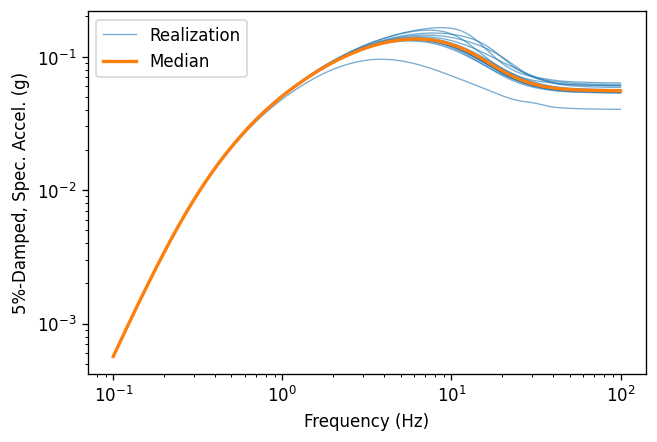

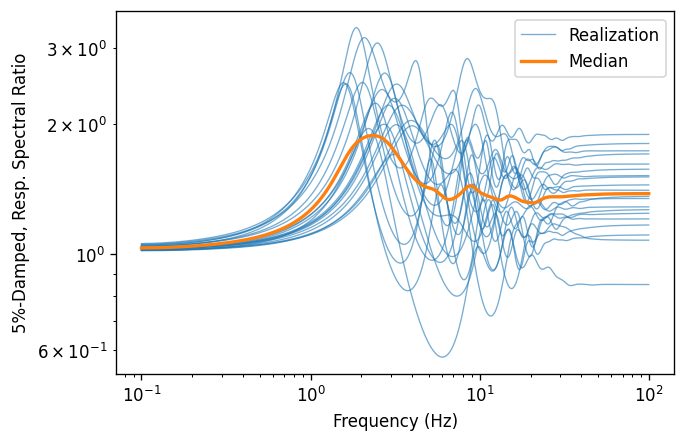

In [9]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

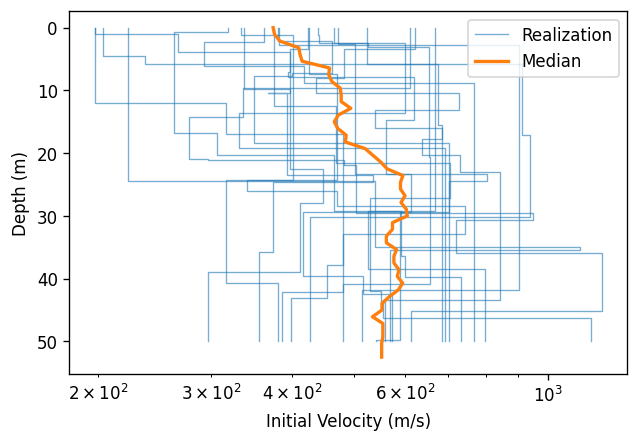

In [10]:
ax = outputs[-1].plot(style="stats")

The statistics of the output can be also retrieved and returned as either a `dict` or `pandas.DataFrame`.

In [11]:
outputs[-1].calc_stats()

{'ref': array([ 0.        ,  1.07142857,  2.14285714,  3.21428571,  4.28571429,
         5.35714286,  6.42857143,  7.5       ,  8.57142857,  9.64285714,
        10.71428571, 11.78571429, 12.85714286, 13.92857143, 15.        ,
        16.07142857, 17.14285714, 18.21428571, 19.28571429, 20.35714286,
        21.42857143, 22.5       , 23.57142857, 24.64285714, 25.71428571,
        26.78571429, 27.85714286, 28.92857143, 30.        , 31.07142857,
        32.14285714, 33.21428571, 34.28571429, 35.35714286, 36.42857143,
        37.5       , 38.57142857, 39.64285714, 40.71428571, 41.78571429,
        42.85714286, 43.92857143, 45.        , 46.07142857, 47.14285714,
        48.21428571, 49.28571429, 50.35714286, 51.42857143, 52.5       ]),
 'median': array([374.14310761, 376.03415684, 383.33136403, 410.19432664,
        411.95736566, 415.07725998, 457.79682637, 456.50821629,
        461.51419159, 475.74707382, 477.34326979, 477.34326979,
        494.10315117, 472.46895746, 465.64182311, 471.58185

In [12]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,374.143108,0.361486
1.071429,376.034157,0.348110
2.142857,383.331364,0.349951
3.214286,410.194327,0.425238
4.285714,411.957366,0.405074
5.357143,415.077260,0.393102
6.428571,457.796826,0.403781
7.500000,456.508216,0.404771
8.571429,461.514192,0.412260


## Repeat using a Generic Depth-Dependent Model

The generic `DepthDependToroVelVariation` follows the SPID guidance.

In [13]:
var_velocity_dd = pysra.variation.DepthDependToroVelVariation.generic_model("USGS C")

In [14]:
outputs.reset()
count = 20
for p in pysra.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity_dd,
    var_soiltypes=var_soiltypes,
):
    calc(m, p.auto_discretize(), p.location("outcrop", index=-1))
    outputs(calc)

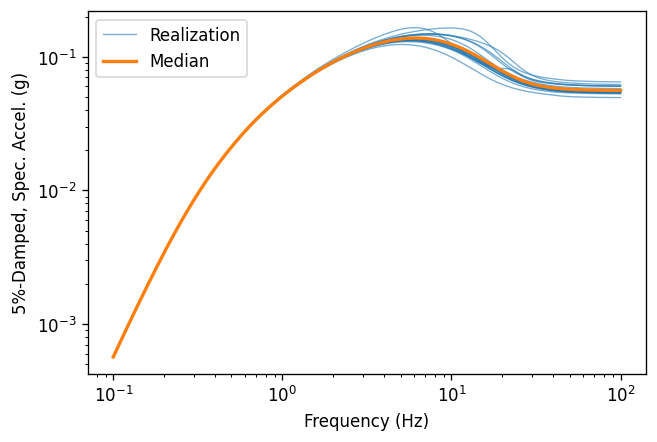

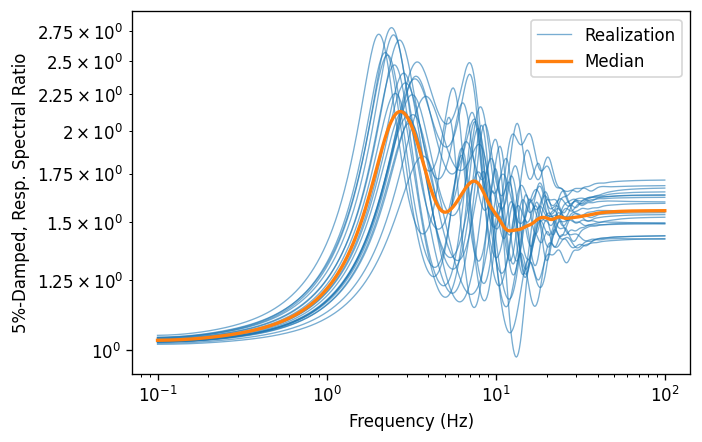

In [15]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

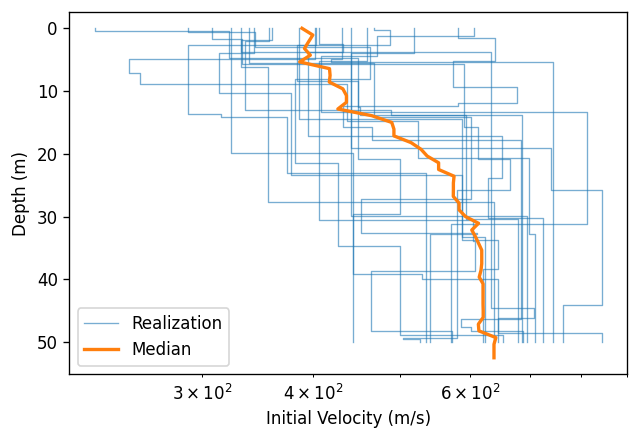

In [16]:
ax = outputs[-1].plot(style="stats")

In [17]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,388.489060,0.231430
1.071429,399.525189,0.193655
2.142857,395.178653,0.185728
3.214286,390.999071,0.194162
4.285714,396.972827,0.213402
5.357143,386.185795,0.216986
6.428571,417.137276,0.265153
7.500000,417.756011,0.262316
8.571429,416.949022,0.261877


## Repeat using a Specific Depth-Dependent Model

In [18]:
var_velocity_dd = pysra.variation.DepthDependToroVelVariation.generic_model(
    "USGS C", depth=[0, 10, 20], ln_std=[0.25, 0.15, 0.10]
)

In [19]:
outputs.reset()
count = 20
for p in pysra.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity_dd,
    var_soiltypes=var_soiltypes,
):
    calc(m, p.auto_discretize(), p.location("outcrop", index=-1))
    outputs(calc)

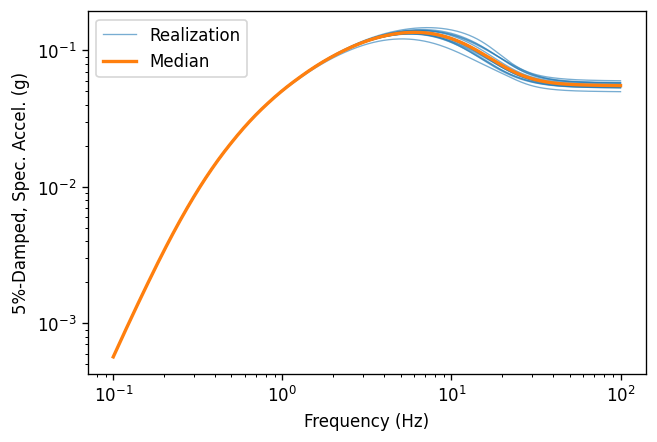

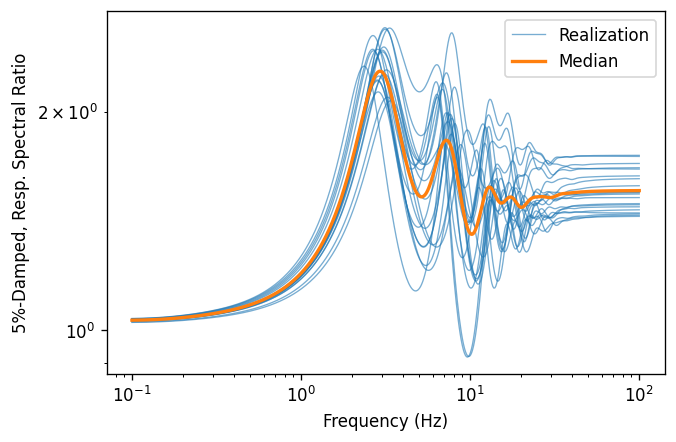

In [20]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

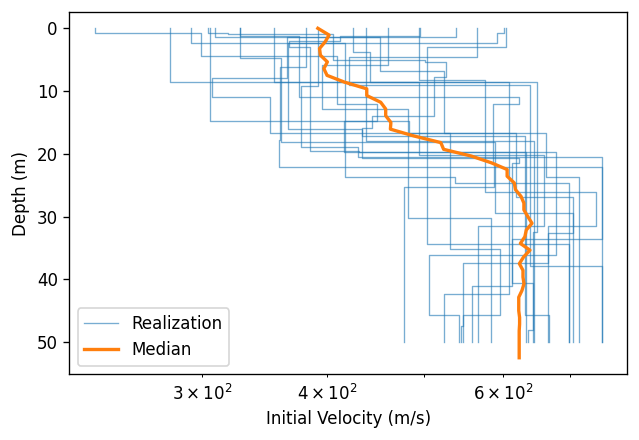

In [21]:
ax = outputs[-1].plot(style="stats")

In [22]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,391.728926,0.271804
1.071429,401.968717,0.244779
2.142857,398.424042,0.222912
3.214286,393.248833,0.176788
4.285714,394.008086,0.177827
5.357143,400.404823,0.151438
6.428571,397.164482,0.153592
7.500000,400.098084,0.162799
8.571429,416.366300,0.191907
